# Autograder Variables

The following code cell defines autograder-specific variables. Execute it and move on.

- INDUS proportion of non-retail business acres per town
- AGE proportion of owner-occupied units built prior to 1940

Using TensorFlow backend.


INDUS       AGE     COST
0    1.028326 -1.028832        1
1   -1.136936 -1.358509        1
2   -0.177047  0.275544        1
3    1.028326  0.988651        3
4   -1.408880 -1.161419        1
5   -1.270703  0.512052        1
6   -1.048738  0.558637        2
7   -1.438279 -1.021665        0
8   -0.972300 -0.856826        2
9   -0.075620 -0.355143        2
10  -0.869402 -0.337226        1
11   1.028326  0.981484        3
12   0.409470  0.576554        1
13  -0.207917 -1.440929        3
14   2.138151  1.002985        3
15  -1.270703 -0.244056        1
16  -0.374023  0.820229        3
17  -1.048738 -0.222555        1
18   1.245881  1.110488        3
19  -0.720935  0.626722        0
20  -0.547479 -0.906994        2
21   1.245881  0.967150        2
22  -0.207917 -0.537899        2
23   1.245881  1.110488        3
24  -1.142816 -0.691987        0
25  -0.075620 -0.591651        1
26  -0.435762  0.899065        2
27  -0.690066 -0.939245        0
28   1.028326  1.110488        3
29   1.028326  1.085404        2
..        ...       ... ..   ...
370 -1.207494  0.250460        0
371 -1.036978  0.157290        0
372  1.585443  1.045986        3
373 -0.690066 -1.322675        1
374 -0.177047  0.483384        0
375  1.245881  0.486968        2
376 -0.616568 -1.261756        1
377 -0.616568 -1.039582        1
378 -1.408880 -1.100501        0
379  1.245881  1.110488        0
380 -1.142816 -0.161637        0
381 -0.435762 -0.448313        1
382 -0.435762  0.762894        2
383  1.028326  0.314962        3
384 -0.917911  0.049787        1
385  1.028326  1.110488        3
386 -0.435762  0.899065        3
387 -0.043280 -1.845858        1
388  1.028326  0.795145        3
389 -0.720935  0.422466        1
390 -1.036978  0.540720        1
391 -0.547479 -0.684820        1
392  1.245881  0.680474        2
393 -0.435762  0.709142        3
394 -1.303042 -0.774407        0
395  1.028326  1.110488        3
396  1.028326  0.802312        2
397 -1.126646 -1.000164        0
398 -0.869402 -1.107668        0
399 -0.720935  0.153707        0

[400 rows x 4 columns]

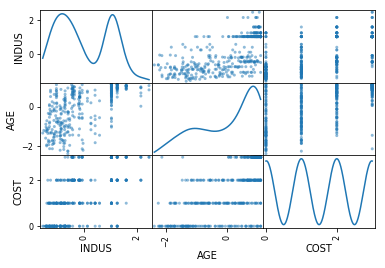

In [7]:
import numpy as np
from keras.datasets import boston_housing
import numpy as np
np.random.seed(42)
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline

def passed(): print('✅')

NB_TRAIN = 400
[X, y], _ = boston_housing.load_data()
X = (X - X.mean(axis=0)) / X.std(axis=0)
y = (y - y.mean()) / y.std()

X, y = X[:NB_TRAIN], y[:NB_TRAIN]
sorted_idxs = np.argsort(y)
X, y = X[sorted_idxs], y[sorted_idxs]
y = np.hstack([np.full(shape=100, fill_value=i) for i in range(4)])
idxs = np.arange(NB_TRAIN)
np.random.shuffle(idxs)
X, y = X[idxs], y[idxs]

X = X[:, [2, 6]]

NB_SAMPLE, NB_FEATURE = X.shape
classes = np.unique(y)
NB_CLASS = len(classes)
df = pd.DataFrame(X, columns=['INDUS', 'AGE'])
df['COST'] = y
scatter_matrix(df, diagonal='kde');
df[''] = ''
df[['INDUS', 'AGE', '', 'COST']]

# Task

- Define a class `MultiLayerPerceptron` which passes the Multi-Layer Perceptron tests

In [8]:
def _set_random_param(size_W1, size_b1, size_W2, size_b2):
    W1 = np.random.randn(size_W1[0],size_W1[1])
    b1 = np.random.randn(size_b1[0])
    W2 = np.random.randn(size_W2[0], size_W2[1])
    b2 = np.random.randn(size_b2[0])
    return W1, b1, W2, b2

In [9]:
!touch classifiers.py

In [10]:
class MultiLayerPerceptron(object):
    def __init__(self, NB_FEATURE, NB_HIDDEN, NB_CLASS):
        self.W1, self.b1, self.W2, self.b2 = _set_random_param((NB_FEATURE, NB_HIDDEN), 
                                                               (NB_HIDDEN,1), 
                                                               (NB_HIDDEN, NB_CLASS),
                                                               (NB_CLASS,1))  
        
    def _sigmoid(self, S):
        return np.exp(S) / np.sum(np.exp(S), axis=1, keepdims=True)
    
    def _f(self, X, W, b):
        return self._sigmoid(np.dot(X,W) + b)
    
    def predict(self, X):        
        for (W, b) in [[self.W1, self.b1],[self.W2, self.b2]]:            
            X = self._f(X, W, b)                       
        return X
    
    def evaluate(self, X, y):
        return np.mean((self.predict(X)).argmax(axis=1) == y)


In [11]:
import classifiers
classifiers.MultiLayerPerceptron = MultiLayerPerceptron

# Constructor Tests

In [12]:
from classifiers import MultiLayerPerceptron

NB_HIDDEN = 16
mlp = MultiLayerPerceptron(NB_FEATURE, NB_HIDDEN, NB_CLASS)

assert type(mlp.W1) == np.ndarray
assert mlp.W1.shape == (NB_FEATURE, NB_HIDDEN)
assert mlp.W1.dtype == np.float64
assert type(mlp.b1) == np.ndarray
assert mlp.b1.shape == (NB_HIDDEN,)
assert mlp.b1.dtype == np.float64
assert type(mlp.W2) == np.ndarray
assert mlp.W2.shape == (NB_HIDDEN, NB_CLASS)
assert mlp.W2.dtype == np.float64
assert mlp.b2.shape == (NB_CLASS,)

passed()

✅


# Prediction Test

In [13]:
y_pred = mlp.predict(X)
assert y_pred.shape == (NB_SAMPLE, NB_CLASS)

passed()

✅


# Evaluation Test

In [14]:
acc = mlp.evaluate(X, y)
assert type(acc) == np.float64
assert 0 <= acc <= 1

P = mlp.predict(X)
y_pred = P.argmax(axis=1)
assert acc == np.mean(y_pred == y)

passed()

✅


YOUR ANSWER HERE

In [15]:
class MultiLayerPerceptronWithRandomOptimizer(MultiLayerPerceptron):
    
    def __init__(self, NB_FEATURE, NB_HIDDEN, NB_CLASS):
        MultiLayerPerceptron.__init__(self, NB_FEATURE, NB_HIDDEN, NB_CLASS)
        
    def _forward(self, X, y):
        Y = np.zeros([len(X), NB_CLASS])        
        Y[np.arange(len(X)), y] = 1
        P = self.predict(X)
        return -np.mean([np.sum(y * np.log(p)) for p, y in zip(P, Y)])
    
    def fit(self, X, y, nb_epoch=1):
        for _ in range(nb_epoch):
            curr_W1, curr_b1, curr_W2, curr_b2 = self.W1, self.b1, self.W2, self.b2  # Store current parameters
            curr_loss = self._forward(X, y)                                          # Store current parameter loss
            self.W1, self.b1, self.W2, self.b2 = _set_random_param(self.W1.shape, 
                                                                   self.b1.shape, 
                                                                   self.W2.shape, 
                                                                   self.b2.shape)   # Find new random parameters
            if curr_loss < self._forward(X, y):                                     # New parameters give higher loss
                self.W1, self.b1, self.W2, self.b2 = curr_W1, curr_b1, curr_W2, curr_b2 # So revert to old parameters

        

In [16]:
classifiers.MultiLayerPerceptronWithRandomOptimizer = MultiLayerPerceptronWithRandomOptimizer

In [17]:
print ("Accuracy and Loss before Random Optimizer Test", mlp.evaluate(X, y), mlp._forward(X, y))

AttributeError: 'MultiLayerPerceptron' object has no attribute '_forward'

# Random Optimizer Test 

In [18]:
from classifiers import MultiLayerPerceptronWithRandomOptimizer

mlp = MultiLayerPerceptronWithRandomOptimizer(NB_FEATURE, NB_HIDDEN, NB_CLASS)

acc = mlp.evaluate(X, y)
for _ in range(1000):
    loss = mlp._forward(X, y)
    mlp.fit(X, y, nb_epoch=10)
    assert mlp._forward(X, y) <= loss
    
assert mlp.evaluate(X, y) > acc

passed()

✅


In [19]:
print ("Accuracy and Loss after Random Optimizer Test", mlp.evaluate(X, y), mlp._forward(X, y))

Accuracy and Loss after ROT 0.39 1.21733318311


# Task

- Define a class `MultiLayerPerceptronWithGradientDescentOptimizer` which extends your `classifiers.MultiLayerPerceptron` model with a gradient descent optimizer

# Hint

- Compute the gradient numerically with finite differences

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Gradient Descent Optimizer Test

In [25]:
import numpy as np
class MultiLayerPerceptronWithGradientDescentOptimizer:


    N, H = 2, 4
    W = np.random.randn(N, H)
    step = 1e-5
def f(W):
    return np.sum(2 * W)

def dfdW(f, W, step):
    # return np.apply_along_axis(lambda w: (f(w + step) - f(w)) / step, arr=W, axis=1)
    h = np.zeros_like(W)
    dW = np.zeros_like(W)
    it = np.nditer(W, flags=['multi_index'])
    while not it.finished:
        ix = it.multi_index
        y = f(W)
        h[ix] = step
        dW[ix] = (f(W+h) - y) / step
        h[ix] = 0
        it.iternext()
    return dW

In [26]:
classifiers.MultiLayerPerceptronWithGradientDescentOptimizer = MultiLayerPerceptronWithGradientDescentOptimizer

In [27]:
from classifiers import MultiLayerPerceptronWithGradientDescentOptimizer

mlp = MultiLayerPerceptronWithGradientDescentOptimizer(NB_FEATURE, NB_HIDDEN, NB_CLASS)

acc = mlp.evaluate(X, y)
loss = mlp._forward(X, y)
for _ in range(100):
    mlp.fit(X, y, nb_epoch=1)
    assert mlp._forward(X, y) < loss
    loss = mlp._forward(X, y)
    
assert mlp.evaluate(X, y) > acc

passed()

TypeError: object() takes no parameters